# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Открываем датасет. Для корректного отображения необходимо добавить разделитель sep. Получили таблицу из 23699 строк и 22 столбцов. Выведем первые 10 строк.

In [414]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем информацию о датафрейме. Присутствуют значения четырех типов - bool(2), float64(14), int64(3), object(3).

На первый взгляд замена типа данных понадобится только для столбца first_day_exposition, который необходимо будет перевести в формат to_datetime.
    
Мы также видим достаточно большое количество столбцов с пропусками, причем как в разделах, где данные вводятся пользователем, так и в картографических данных.

В названиях населенных пунктов встречаются дубликаты. Как минимум, повторяется Санкт-Петербург. Правильность написания населенных пунктов проверим далее.

In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для каждого числового значения. Разбивка на 20 корзин выглядит оптимальной для первого взгляда. Можно сделать первые выводы:
1. в объявления загружается до 20 фото
2. площадь большиства квартир в пределах 100 кв м
3. большинство имеет 1-3 комнаты
4. основная масса квартир расположена в пределах первых 10 этажей
5. площадь кухонь составляет в основном около 10 кв м
6. квартиры либо не имеют балконов, либо 1-2. больше - редко
7. большинство квартир расположены на расстоянии 10-50 км до аэропорта
8. до центра города как правило не больше 20 км
9. большинство квартир не имеют рядом парка в пределах 3 км, либо имеют один
10. тем, у кого есть рядом парк, добираться до него не больше 1 км
11. то же самое можно сказать о прудах, но их распределение по расстоянию более ровное
12. квартиры продаются достаточно быстро, как правило, в течение года

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

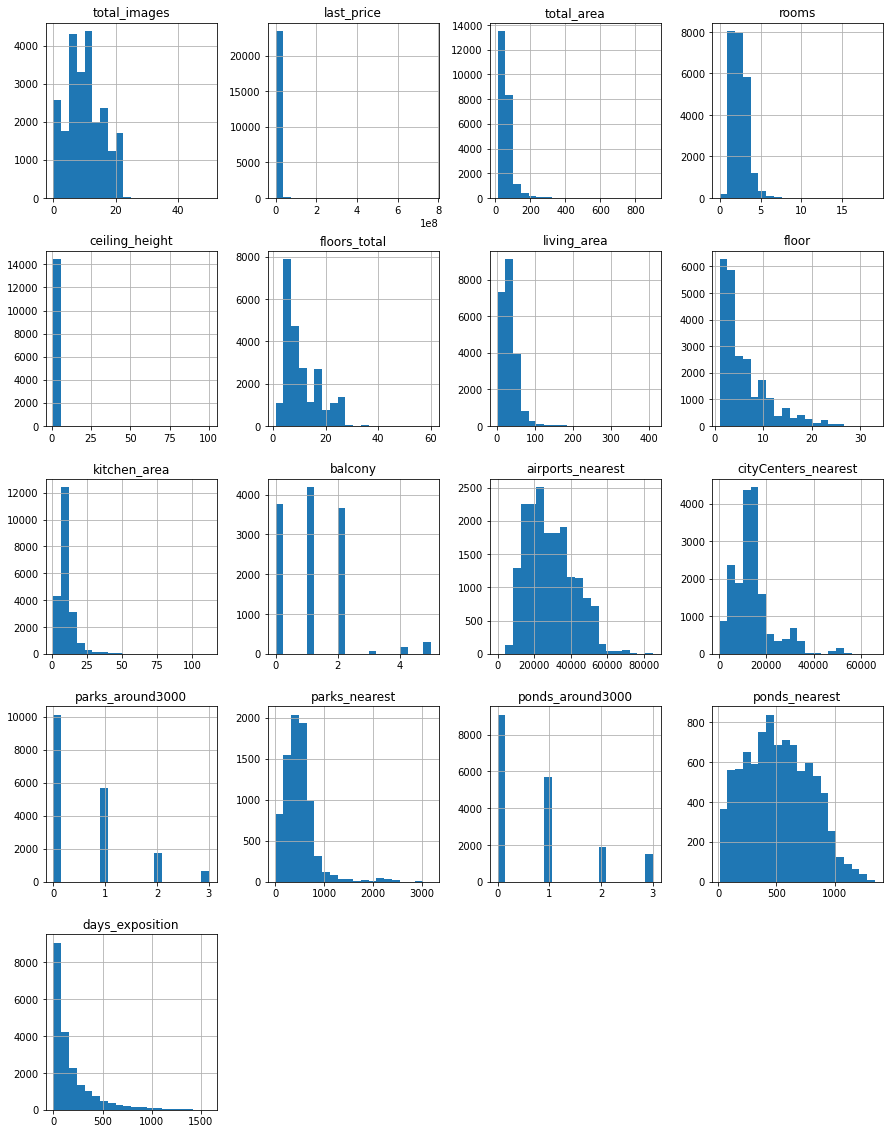

In [416]:
data.hist(bins=20, figsize=(15, 20))

### Предобработка данных

Посчитаем количество пропусков в каждом стоблце. Столбцов с пропусками много, и количество пропусков в них сильно отличается. Где-то их немного, Где-то почти все это пропуски. Рассмотрим каждый столбец с пропуском отдельно

In [417]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Высота потолка. 

9195 пропусков в значении высоты потолка. Также есть несколько выделяющихся значений, которые мы собрали в отдельный список wrong_ceiling_height. Большинство значений в нем (например, 25.0) выглядят обычными ошибками при вводе, поэтому их можно исправить (например, на 2.5). 

Странно выглядят значения, где высота потока равна 10 м, но гугл говорит, что такие потолки могут быть питерских квартирах. 

Выведем отдельно квартиры с потолком 100 м и 14 м. По параметрам они выглядят как обычные квартира, а значение высоты 14 или 100 похоже на ошибку (в первом случае такое же значение стоит в соседнем столбце с количеством этажей). 

Если вывести отдельно строки с пропущенными значениями, то квартиры в них тоже выглядят вполне обычно. По нормам обычная высота потолка в российских домах - 2.6-2.7 м.

Заменим высоты 14, 100, 10 и пропущенные значения на медианную высоту 2.65.

Пропуски в значениях высоты потолка составляют 38,7%. Пользователи могли не указывать высоту потолка, так как размещали объявление с квартирой с каком-нибудь стандартном доме со стандартной высотой потолка, либо просто не посчитали эту информацию существенной объявления.

In [418]:
data[data['ceiling_height'].isna()]
data['ceiling_height'].isna().sum() / len(data)

0.38799105447487237

Выведем отсортированные уникальные значения высоты потолка. Обратим внимание на наличие как небольших значений ниже 2 м, так и очень высоких, выше 10 м.

In [419]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Гистрограмма и список характерных значений показывают большую концентрацию высот в районе 2,5-2,8 м, дальше идет распределение по более высоким значениям. Есть нехарактерно маленькие значения, минимальное из которых 1 м.

<AxesSubplot:>

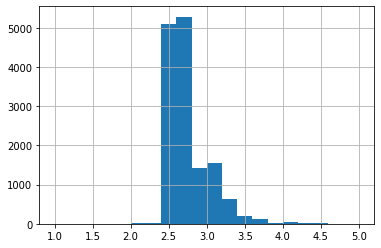

In [420]:
data['ceiling_height'].hist(bins=20, range=(1, 5))

In [421]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Так как мы имеем дело, в том числе, с Санкт-Петербургом, то мы можем предположить квартиры с достаточно большой высотой потолков, типа 5 м. Гугл подсказывает, что такие потолки могут быть до 10 м в отдельных домах. Но все остальное является слишком высокими значениями.

Для наглядности выведем аномально высокие значения в отдельный список. Почти все они выглядят, как ошибка ввода, когда хотели написать 2.5, а получилось 25. Разделим такие значения на 10.

In [422]:
wrong_ceiling_height = []
for ceiling in data['ceiling_height']:
    if ceiling > 10.:
        wrong_ceiling_height.append(ceiling)
wrong_ceiling_height

[25.0,
 32.0,
 25.0,
 27.0,
 24.0,
 27.0,
 26.0,
 27.0,
 25.0,
 25.0,
 27.0,
 25.0,
 25.0,
 14.0,
 20.0,
 27.0,
 25.0,
 27.0,
 22.6,
 27.5,
 27.0,
 10.3,
 32.0,
 100.0,
 27.0]

Выведем отдельно посмотреть квартиры с потолками 14 и 100 м

In [423]:
data[data['ceiling_height'] == 14.]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0


In [424]:
data[data['ceiling_height'] == 100.]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Неправильные значения потолка можно исправить, разделив на 10.

In [425]:
ceiling_heights = data['ceiling_height']

for ceiling_height in range(len(ceiling_heights)):
    if ceiling_heights[ceiling_height] > 10:
        ceiling_heights[ceiling_height] = ceiling_heights[ceiling_height] / 10

data['ceiling_height'].sort_values().unique()

/tmp/ipykernel_31/1716264110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceiling_heights[ceiling_height] = ceiling_heights[ceiling_height] / 10


array([ 1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,
        2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,
        2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,
        2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,
        2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,
        2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,
        2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,
        2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,
        3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,
        3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,
        3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,
        3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,
        3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,
        3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,
        3.62,  3.63,

Выведем обновленную информацию с столбце. Половина значений лежит в диапазоне 2,5 - 2,8 м, что составляет стандартную высоту потолка в квартирах. Но другая половина - за пределами этих значений, поэтому однозначно сделать вывод о замене пропусков на обозначенный выше диапазон нельзя. Оставляем пропуски.

In [426]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

У нас также осталось 5 строк с высотой потолка ниже 2 м. Это слишком маленькие значения. Их можно удалить.

In [427]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,1.40,14.0,32.4,5,NaN,...,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,1.03,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [428]:
#data.drop(index=[5712, 15061, 16934, 22309, 22590], axis=0, inplace=True)
data['ceiling_height'].describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Общее количество этажей в доме

Выведем отдельной строкой количество пропусков в столбце общего количества этажей в доме. Выведем отдельно для примера пять строк с пропусками. Помимо пропусков, остальные данные выглядят адекватно. Самих пропусков мало, заменить их чем-то сложно. Продавцы квартир могли не указывать общее количество этажей в доме, так как считают, что этажа самой квартиры достаточно, речь идет о каком-то понятном доме, микрорайоне, или просто забыть. Могут быть разные причины и мотивы.

Поэтому попробуем удалить сроки с пропусками из таблицы.

In [429]:
data['floors_total'].isna().sum()

86

In [430]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [432]:
data = data.dropna(subset=['floors_total'])
data.reset_index()
#data['floors_total'].isna().sum()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23608,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23609,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23610,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23611,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Жилая площадь

Пропусков достаточно много. Очевидной замены им нет. Видимо, продавцы считают общую площадь квартиры более значимым показателей, раз не указывают жилую. Еще это могут быть апартаменты, где понятие жилой площади тоже довольно условное.

Отметитм для дальнейшего анализа, что в значениях жилой площади встречаются как очень большие, так и слишком маленькие значения. И если в квартиру с жилой площадью 400 кв м еще можно поверить, то как жить на 2 кв м - непонятно. По санитарным нормам - минимум жилой площади составляет 8 кв м.

In [433]:
data['living_area'].isna().sum()

1870

In [435]:
data['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [437]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [438]:
#data[data['living_area'] > 300]
data[data['living_area'] < 8]
#data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.6,5.0,6.0,1,NaN,...,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,NaN,25.0,5.0,8,NaN,...,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.5,22.0,6.5,21,NaN,...,18.0,NaN,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.5,9.0,5.4,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Значения is_apartment представлены nan, False, True. Можно предположить, что если человек не указал, что в его объявлении апартаменты, то это не они. Заменим значение на 1 - апартаменты, 0 - квартира.

In [440]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [441]:
data.loc[data['is_apartment'] == True, 'is_apartment'] = 1
data.loc[data['is_apartment'] == False, 'is_apartment'] = 0
data['is_apartment'] = data['is_apartment'].fillna(0)
#data['is_apartment'].unique()
data['is_apartment'].value_counts()

0    23563
1       50
Name: is_apartment, dtype: int64

Площадь кухни.

Аналогично с жилой площадью. Пропусков достаточно много. Очевидной замены им нет. Видимо, продавцы считают общую площадь квартиры более значимым показателем.

На будущее отметим, что согласно нормам, минимальная площадь кухни должна быть 6-8 кв м. У нас 25% объявлений - ниже 7 кв м. На гистрограмме видно, что объявлений с кухнями площадью ниже 5 кв м почти нет. Удалим их из таблицы. Пропуски пока придется оставить.

In [442]:
#data['kitchen_area'].unique()
#data['kitchen_area'].isna().sum()
#data['kitchen_area'].value_counts()
data['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

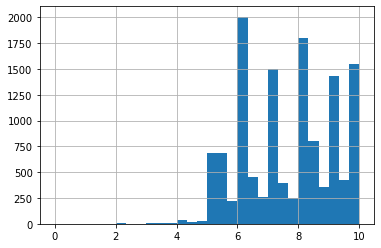

In [443]:
#data[data['kitchen_area'].isna()]
#data[data['kitchen_area'] <= 5]
data['kitchen_area'].hist(bins=30, range=(0, 10))

Как и в предыдущем случае, предположим, что если человек не указал, что у него есть балкон, то балкона нет. Заменим все пропущенные значения на 0.

In [445]:
data['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

In [447]:
#data['balcony'].isna().sum()
data['balcony'] = data['balcony'].fillna(0)
#data['balcony'].sort_values().unique()
data['balcony'].value_counts()

0.0    15193
1.0     4195
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

В списке географических названий встречаются разные написания посёлка. Приведем все к одному виду, заменив буквы ё на е.
Также, согласно википедии, в РФ поселок городского типа - это общее обозначение, которое включает в себя все другие виды поселков (городские поселки, поселки при ж/д). Приведем их одному виду для удобства - поселок.
По этому же принципу переименуем СНТ в садовое товарищество.

Также можно убрать в целом обозначения населенных пунктов, т.к. в данных, например, встречается Мурино и поселок Мурино, что скорее всего одно и то же.

В таблице остаются пропуски в названиях. Замену им не придумать без дополнительной информации. 

In [448]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [449]:
#data['locality_name'].value_counts()

In [450]:
data['locality_name'] = data['locality_name'].str.replace(r'поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'поселок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'посёлок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'городской поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'городской посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'посёлок станции', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'посёлок при железнодорожной станции', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace(r'коттеджный посёлок', 'посёлок')
#data['locality_name'].unique()
#data['locality_name'].value_counts()

data['locality_name'] = data['locality_name'].str.replace(r'ё', 'е')
data['locality_name'] = data['locality_name'].str.replace(r'садоводческое некоммерческое товарищество', 'садовое товарищество')
data['locality_name'] = data['locality_name'].str.replace(r'деревня ', '')
data['locality_name'] = data['locality_name'].str.replace(r'поселок ', '')
data['locality_name'] = data['locality_name'].str.replace(r'садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace(r'село ', '')

In [451]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Пропусков в значениях расстояния до аэропорта достаточно много. Так как это картографические данные, то либо аэропорт находится слишком далеко, либо определить расстояние до него невозможно (например, в объявлении не указано местоположение квартиры). В любом случае, самостоятельно мы не сможем здесь подобрать замену пропускам, поэтому оставляем их.

In [452]:
data['airports_nearest'].sort_values().unique()
#data[data['airports_nearest'].isna()]
#data['airports_nearest'].hist(bins=50, range=(0, 10000))

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [453]:
data['airports_nearest'].isna().sum()

5532

In [455]:
data['airports_nearest'].describe()

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

По тем же причинам, что и с аэропортом, оставим пропуски в значениях расстояния до центра города.

In [456]:
data['cityCenters_nearest'].isna().sum()
#data['cityCenters_nearest'].sort_values().unique()
#data = data.dropna(subset=['cityCenters_nearest'])

5509

In [457]:
data['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

Аналогично с балконом, если не указано, что рядом есть парк, то его нет, поэтому пропуски можно заменить на 0.

In [458]:
data['parks_around3000'].value_counts()

0.0    10064
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

In [459]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].value_counts()

0.0    15572
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

Если парка нет в пределах 3000 м, то среднее расстояние до него около 3100 м. Но не факт, что остальные пропуски могут иметь такое же значение. Оставим пропуски, так как это тоже может быть связано с тем, что не во всех объявлениях указано точное местоположение квартиры.

In [460]:
#data['parks_nearest'].value_counts()
#data['parks_nearest'].isna().sum()
#data['parks_nearest'].max()
#data[(data['parks_around3000'] == 0.0) & (data['parks_nearest'])]
#data[(data['parks_nearest'].isna()) & (data['parks_around3000'] == 0.0)]
data_pivot = data.pivot_table(index='parks_around3000', values='parks_nearest', aggfunc='mean')
data_pivot

,parks_nearest
parks_around3000,
0.0,3114.250000
1.0,545.722645
2.0,371.309948
3.0,311.928682


То же самое с прудами. Если не указано, что они есть рядом, заполним пропуски 0.

In [461]:
data['ponds_around3000'].sort_values().unique()
data['ponds_around3000'].value_counts()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].value_counts()

0.0    14552
1.0     5677
2.0     1886
3.0     1498
Name: ponds_around3000, dtype: int64

И здесь пропуски пока оставляем по обозначеным выше причинам.

In [462]:
data['ponds_nearest'].describe()
#data['ponds_nearest'].value_counts()
data['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

Наша база данных охватывает объявления, размещенные с 2014-11-27 по 2019-05-03. Так как в строке первого дня размещения пропусков нет, то пропуски в количестве дней можно объявнить тем, что на момент закрытия таблицы объявление еще оставалось активным. В целом можно было бы заполнить пропуски разницей между 2019-05-03 и 2014-11-27. Но могут быть и другие причины.

Другое дело, что к этому моменту у нас не осталось пропусков в этом столбце)

In [463]:
data['first_day_exposition'].max()

'2019-05-03T00:00:00'

In [464]:
data['first_day_exposition'].min()

'2014-11-27T00:00:00'

In [465]:
data['first_day_exposition'].isna().sum()

0

In [466]:
#data['days_exposition'].value_counts()
data['days_exposition'].describe()
#data['days_exposition'].hist(bins=50, range=(400, 1600))
#data['days_exposition'].isna().sum()
#data[data['days_exposition'].isna()]

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Приведем данные из first_day_exposition из формата object к формату datetime.

In [467]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  int64         
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [469]:
# новый столбец со стоимостью квадратного метра
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price'] = data['square_meter_price'].round(0)

In [470]:
# новый столбец с днями недели, когда было размещено объявление, в формате 0 - понедельник, 6 - воскресенье
data['weekday_exposed'] = data['first_day_exposition'].dt.weekday

In [471]:
# новый столбец с месяцем, когда было размещено объявление
data['month_exposed'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [472]:
# новый столбец с годом, когда было размещено объявление
data['year_exposed'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [473]:
# столбец с типом этажа квартиры

def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(type_of_floor, axis=1)

In [474]:
#cityCenters_nearest
data['km_to_city_center'] = data['cityCenters_nearest'] / 1000
data['km_to_city_center'] = data['km_to_city_center'].round(0)

In [475]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposed,month_exposed,year_exposed,floor_type,km_to_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

Выведем общую информацию о площади квартир. 3/4 объявлений площадью меньше 75 кв м. В выборке присутствуют несколько квартир с площадью более 400 кв м. Возможно, принципы формирования цены на них будут отличаться от обычных 1-2-комнатных квартир.

Минимальное значение - 20 кв м, как обычная студия. Хорошо, что нет площади меньше)

Создадим отдельную таблицу, в которую будем собирать наиболее популярные варианты квартир.

In [476]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

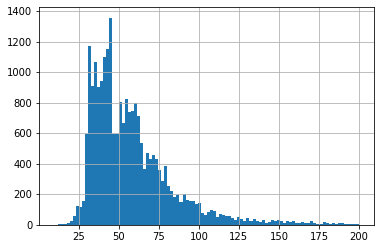

In [477]:
data['total_area'].hist(bins=100, range=(10, 200))

<AxesSubplot:>

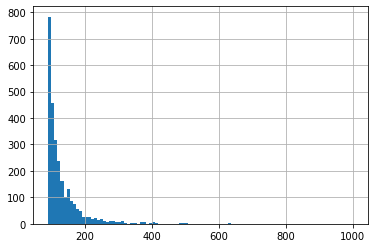

In [478]:
data['total_area'].hist(bins=100, range=(90, 1000))

3/4 объявлений - площадью ниже 75 кв м, на гистограмме видно, что количество квартир резко падает после 90-100 кв м. Уберем для верности объявления выше 200 кв м, где объявлений совсем мало и они будут искажать общую картину.

In [479]:
popular_flats = data[data['total_area'] < 200]

Рассмотрим жилую площадь. Как мы видим из сопоставления описания данных и гистрограммы, выделяются квартиры жилой площадью около 20, 30, 40 кв м. Похоже на 1-2-3-комнатные квартиры. Сводная таблица в целом подтверждает эту теорию. Большинство квартир на рынке имеют не более 3 комнат. мы также видим небольшой хвост квартир выше 100 кв м жилой площади. Отфильтруем его .

In [480]:
popular_flats['living_area'].describe()

count    21542.000000
mean        33.248381
std         17.348523
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:>

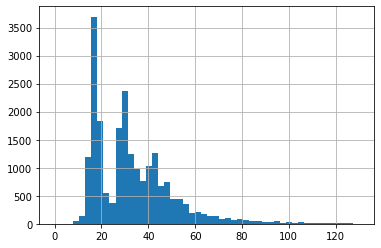

In [481]:
popular_flats['living_area'].hist(bins=50, range=(0, 130))

In [482]:
living_pivot = popular_flats.pivot_table(index='rooms', values='living_area', aggfunc=['mean', 'count'])
living_pivot

,mean,count
,living_area,living_area
rooms,,
0,18.865246,183
1,17.900308,7368
2,31.736574,7279
3,47.248946,5343
4,64.547245,1049
5,88.087917,240
6,105.689649,57
7,108.794737,19


In [483]:
popular_flats = popular_flats[popular_flats['living_area'] < 100]

С площадью кухонь мы успели поработать еще во второй части, убрав самые маленькие значения. Тем не менее осталось необычное максимальное значение. Посмотрим на гистограмму. У гистограммы получается длинный хвост после 30 с отдельными выбросами после 50. Уберем последние.

In [484]:
popular_flats['kitchen_area'].describe()

count    20577.000000
mean        10.264408
std          5.236109
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64

In [485]:
popular_flats[popular_flats['kitchen_area'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposed,month_exposed,year_exposed,floor_type,km_to_city_center
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,0,...,NaN,3.0,99.0,541.0,279503.0,1,10,2017,другой,7.0
263,12,39900000.0,140.6,2016-11-19,2,3.50,8.0,39.8,7,0,...,NaN,3.0,99.0,NaN,283784.0,5,11,2016,другой,7.0
511,7,5950000.0,69.0,2017-12-21,1,NaN,16.0,13.0,12,0,...,NaN,0.0,NaN,56.0,86232.0,3,12,2017,другой,NaN
656,10,18500000.0,131.0,2018-10-11,3,2.80,20.0,64.0,19,0,...,139.0,0.0,NaN,53.0,141221.0,3,10,2018,другой,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20930,10,23000000.0,107.0,2016-04-21,3,3.00,13.0,31.0,11,0,...,620.0,1.0,809.0,858.0,214953.0,3,4,2016,другой,5.0
20969,18,13300000.0,133.0,2015-02-11,4,3.00,5.0,58.0,2,0,...,NaN,1.0,534.0,1512.0,100000.0,2,2,2015,другой,5.0
21081,11,9700000.0,85.2,2018-08-04,2,NaN,8.0,38.0,2,0,...,NaN,0.0,NaN,36.0,113850.0,5,8,2018,другой,16.0
21331,15,16000000.0,93.4,2019-03-26,3,2.80,17.0,24.3,6,0,...,NaN,2.0,495.0,NaN,171306.0,1,3,2019,другой,8.0


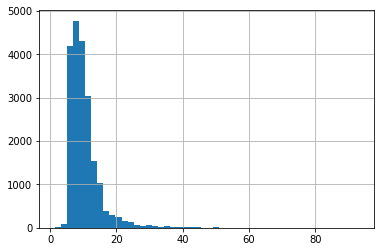

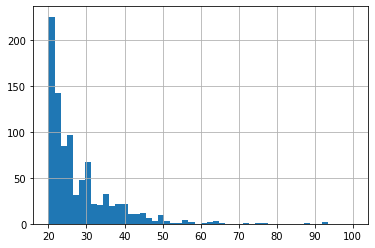

In [486]:
popular_flats['kitchen_area'].hist(bins=50)
plt.show()
popular_flats['kitchen_area'].hist(bins=50, range=(20, 100))
plt.show()

In [487]:
popular_flats = popular_flats[popular_flats['kitchen_area'] < 50]

Переведем стоимость квартир в млн и перезапишем столбец.

In [488]:
popular_flats.insert(2, 'last_price_mln', popular_flats['last_price'] / 1000000)
popular_flats.head()

,total_images,last_price,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposed,month_exposed,year_exposed,floor_type,km_to_city_center
0,20,13000000.0,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
4,2,10000000.0,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,2.890,30.4,2018-09-10,1,NaN,12.0,14.4,5,...,NaN,0.0,NaN,55.0,95066.0,0,9,2018,другой,NaN


В описании данных даже без гистрораммы видны аномально низкая и аномально высокая цены.

In [489]:
popular_flats['last_price_mln'].describe()

count    20545.000000
mean         5.861678
std          5.696080
min          0.012190
25%          3.490000
50%          4.640000
75%          6.600000
max        330.000000
Name: last_price_mln, dtype: float64

На гистограмме видно несколько отдельно стоящих значений с очень высокой ценой. Их можно удалить. Также уберем единственное минимальное значение.

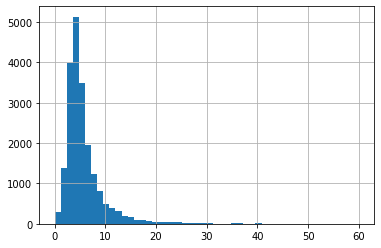

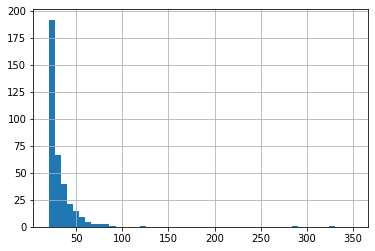

In [490]:
popular_flats['last_price_mln'].hist(bins=50, range=(0, 60))
plt.show()
popular_flats['last_price_mln'].hist(bins=50, range=(20, 350))
plt.show()

In [491]:
#popular_flats = popular_flats[popular_flats['last_price_mln'] > 1.2]
popular_flats = popular_flats.query('last_price_mln > 1.2 and last_price_mln < 100')

Количество комнат мы уже немного изучили в одном из предыдущих пунктов и выяснили, что большинство объвлений имеют от 1 до 3 комнат.

In [492]:
popular_flats['rooms'].describe()

count    20212.000000
mean         2.040125
std          0.940737
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Даже без гистограммы видно, что мы может отказаться от значений с 6-7 комнатами.

In [494]:
popular_flats['rooms'].value_counts()

2    6960
1    6912
3    5179
4     971
5     163
6      22
7       5
Name: rooms, dtype: int64

<AxesSubplot:>

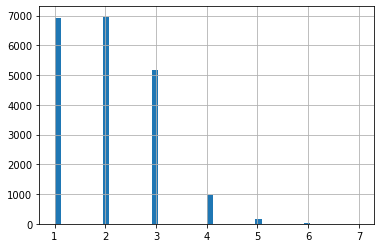

In [495]:
popular_flats['rooms'].hist(bins=50)

In [496]:
popular_flats = popular_flats.query('rooms < 6')

Так как мы имеем дело с квартирами преимущественно в Санкт-Петербурге, то в доме могут быть высокие потолки. Тем не менее, значения ниже 2.4 и выше 5 метров можно отбросить, так как их немного, и они выглядят слишком экстремально.

In [497]:
popular_flats['ceiling_height'].describe()

count    12858.000000
mean         2.713812
std          0.277189
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [498]:
popular_flats[popular_flats['ceiling_height'] < 2.4]

,total_images,last_price,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposed,month_exposed,year_exposed,floor_type,km_to_city_center
552,11,2999000.0,2.999,33.50,2017-03-30,1,2.00,15.0,17.500000,6,...,520.0,1.0,949.0,270.0,89522.0,3,3,2017,другой,12.0
1582,4,4100000.0,4.100,45.60,2016-01-13,2,2.30,9.0,28.400000,8,...,489.0,1.0,525.0,329.0,89912.0,2,1,2016,другой,15.0
2572,4,2400000.0,2.400,62.00,2018-12-27,3,2.00,5.0,40.000000,4,...,NaN,0.0,NaN,NaN,38710.0,3,12,2018,другой,NaN
4212,1,2120000.0,2.120,35.43,2017-12-18,1,2.00,18.0,16.600000,9,...,NaN,0.0,NaN,36.0,59836.0,0,12,2017,другой,NaN
5498,17,2200000.0,2.200,56.00,2018-04-02,2,2.30,5.0,45.000000,1,...,NaN,0.0,NaN,55.0,39286.0,0,4,2018,первый,NaN
5712,5,1500000.0,1.500,42.80,2017-08-14,2,1.20,2.0,27.500000,1,...,NaN,0.0,NaN,248.0,35047.0,0,8,2017,первый,NaN
11352,4,3300000.0,3.300,36.00,2017-06-18,1,2.00,17.0,15.200000,12,...,NaN,0.0,NaN,53.0,91667.0,6,6,2017,другой,27.0
12755,2,1400000.0,1.400,22.50,2017-09-21,1,2.20,2.0,18.000000,2,...,NaN,0.0,NaN,45.0,62222.0,3,9,2017,последний,NaN
15061,19,5600000.0,5.600,56.40,2018-05-11,2,1.40,14.0,32.400000,5,...,NaN,0.0,NaN,315.0,99291.0,4,5,2018,другой,14.0
16446,6,12300000.0,12.300,88.30,2019-03-12,3,2.00,5.0,63.900000,2,...,568.0,1.0,154.0,NaN,139298.0,1,3,2019,другой,8.0


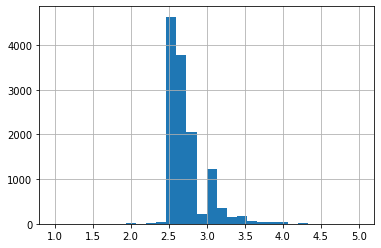

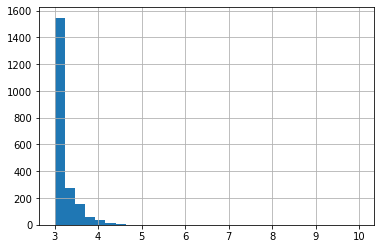

In [499]:
popular_flats['ceiling_height'].hist(bins=30, range=(1, 5))
plt.show()
popular_flats['ceiling_height'].hist(bins=30, range=(3, 10))
plt.show()

In [500]:
popular_flats = popular_flats.query('ceiling_height > 2.4 and ceiling_height < 5')

Довольно много квартир располагается на первых этажах. На последних этажах сопоставимое число, но так как последний этаж может быть любым, по гистограме оно "размазано". Здесь ничего удалять/исправлять не будем.

In [501]:
popular_flats['floor'].describe()

count    12811.000000
mean         5.670205
std          4.624204
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: floor, dtype: float64

<AxesSubplot:>

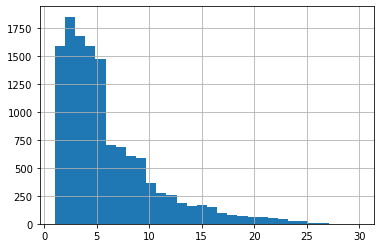

In [502]:
popular_flats['floor'].hist(bins=30)

In [503]:
popular_flats['floor_type'].value_counts()

другой       9416
последний    1811
первый       1584
Name: floor_type, dtype: int64

Данные показывают нам уникальный одноэтажный дом, а также дом с 60 этажами. В остальном все выглядит логично - множно пяти-, девятиэтажек и более высоких домов.

Удалим из данных дома с 1 этажом, которые скорее всего являются частными, и дом с 60 этажами, как неправдоподобно высокий.

In [504]:
popular_flats['floors_total'].describe()

count    12811.000000
mean        10.290141
std          6.186691
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

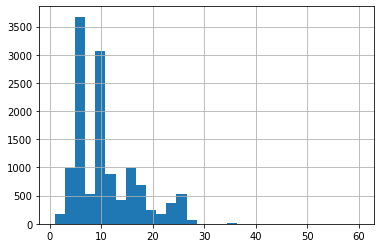

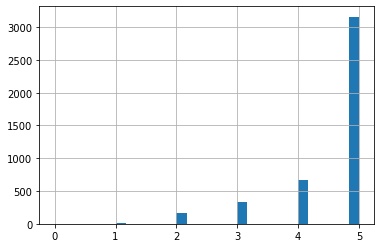

In [505]:
popular_flats['floors_total'].hist(bins=30)
plt.show()
popular_flats['floors_total'].hist(bins=30, range=(0, 5))
plt.show()

In [506]:
popular_flats[popular_flats['floors_total'] == 1]

,total_images,last_price,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposed,month_exposed,year_exposed,floor_type,km_to_city_center
8335,10,2700000.0,2.700,80.0,2018-07-07,3,3.00,1.0,45.0,1,...,NaN,0.0,NaN,51.0,33750.0,5,7,2018,первый,NaN
8388,20,3550000.0,3.550,48.2,2019-03-30,3,2.65,1.0,33.9,1,...,NaN,0.0,NaN,NaN,73651.0,5,3,2019,первый,31.0
11641,6,3685000.0,3.685,44.7,2018-07-05,1,2.50,1.0,23.5,1,...,NaN,3.0,534.0,112.0,82438.0,3,7,2018,первый,15.0
14836,3,3900000.0,3.900,45.0,2018-02-01,2,3.00,1.0,28.4,1,...,NaN,2.0,640.0,196.0,86667.0,3,2,2018,первый,24.0
15543,12,3500000.0,3.500,54.0,2017-12-01,2,2.90,1.0,24.4,1,...,NaN,0.0,NaN,202.0,64815.0,4,12,2017,первый,NaN
17020,10,3700000.0,3.700,100.0,2018-01-01,3,3.00,1.0,35.0,1,...,NaN,0.0,NaN,346.0,37000.0,0,1,2018,первый,NaN
21603,12,1900000.0,1.900,40.0,2019-01-29,2,2.90,1.0,19.2,1,...,NaN,0.0,NaN,NaN,47500.0,1,1,2019,первый,NaN
22855,16,2950000.0,2.950,31.0,2018-03-07,1,2.70,1.0,16.4,1,...,188.0,1.0,269.0,328.0,95161.0,2,3,2018,первый,54.0


In [507]:
popular_flats = popular_flats.query('floors_total > 1 and floors_total < 40')

В основном квартиры находятся в пределах 20 км от центра. Есть отдельные различимые группы в районе 30, 40, 50 км. При этом максимальное расстояние от одного конца СПб до другого (самый крупный город в нашей выборке) по разным данным 70-100 км. То есть самое дальнее расстояние до центра, по идее, не должно превышать 35-50 км. Где-то на этом месте и заканчивается основная масса объявлений. А значит, самое дальнее значение 66 км можно убрать.

In [508]:
popular_flats['cityCenters_nearest'].describe()

count    10360.000000
mean     14338.561197
std       8739.827284
min        208.000000
25%       9616.500000
50%      13123.000000
75%      16105.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

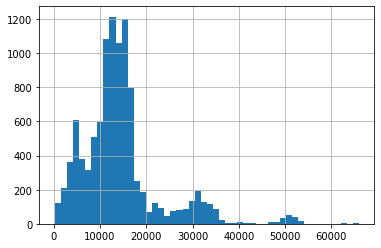

In [509]:
popular_flats['cityCenters_nearest'].hist(bins=50)

In [510]:
popular_flats = popular_flats.query('cityCenters_nearest < 65000')

По логике из предыдущего пункта, расстояния до аэропора в таблице имеют право на жизнь.

In [511]:
popular_flats['airports_nearest'].describe()

count    10339.000000
mean     28919.439307
std      12721.212869
min          0.000000
25%      18418.500000
50%      26960.000000
75%      37310.000000
max      83758.000000
Name: airports_nearest, dtype: float64

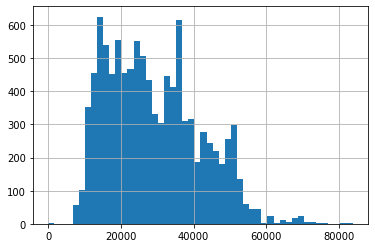

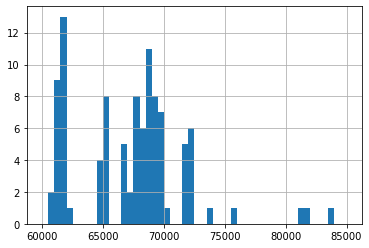

In [512]:
popular_flats['airports_nearest'].hist(bins=50)
plt.show()
popular_flats['airports_nearest'].hist(bins=50, range=(60000, 85000))
plt.show()

Оставим без изменений значений с парками. Как мы предположили ранее, отсутствие значений выше 3100 м означает, что рядом нет парка.

In [513]:
popular_flats['parks_nearest'].describe()

count    4679.000000
mean      478.796965
std       320.625573
min         3.000000
25%       287.000000
50%       451.000000
75%       604.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

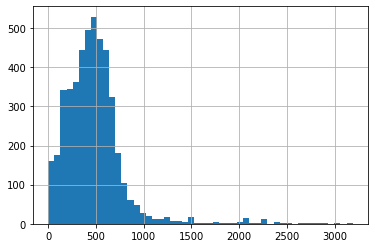

In [514]:
popular_flats['parks_nearest'].hist(bins=50)

Возможно, это не совсем логично, но в выходные размещается значительно меньше объявлений. Посмотрим, влияет ли это как-то на цену размещения.

In [515]:
popular_flats['weekday_exposed'].value_counts()

1    1926
3    1893
2    1706
0    1690
4    1657
5     807
6     677
Name: weekday_exposed, dtype: int64

<AxesSubplot:>

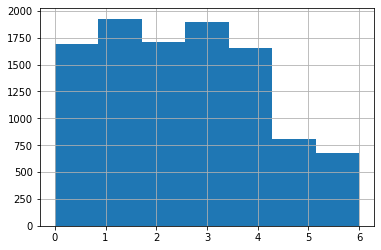

In [516]:
popular_flats['weekday_exposed'].hist(bins=7)

In [517]:
# объявления, размещенные в будни
popular_flats_weekday = popular_flats[popular_flats['weekday_exposed'] < 5]

# объявления, размещенные в выходные
popular_flats_weekends = popular_flats[popular_flats['weekday_exposed'] > 4]

В данных по месяцам просматривается явная сезонность, когда первый пик объявлений приходится на февраль-апрель, затем идет летний спад, и снова выход на пик с сентября до ноября.

In [518]:
popular_flats['month_exposed'].value_counts()

2     1232
3     1192
4     1092
11    1040
10     962
9      874
8      810
7      748
6      643
1      627
12     626
5      510
Name: month_exposed, dtype: int64

<AxesSubplot:>

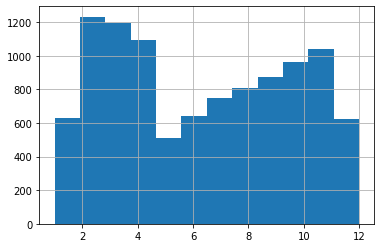

In [519]:
popular_flats['month_exposed'].hist(bins=12)

3/4 квартир продаются в течение года, причем на подажу половины нужно менее 100 дней. А какая-то квартира ушла за 1 день. В среднем на продажу уходит 183 дня (почти ровно полгода), а медианное значение составляет 99 дней. Продажи в пределах 100 дней можно считать достаточно быстрыми. 

3/4 квартир продаются в течение года, причем на подажу половины нужно менее 100 дней. А какая-то квартира ушла за 1 день. В среднем на продажу уходит 183 дня (почти ровно полгода), а медианное значение составляет 99 дней.

При этом мы видим на короткой гистограмме несколько выбросов в районе 30, 45, 60 дней. В регионах у сервиса яндекс.недвижимость это соответствует периоду бесплатных объявлений в зависимости от стоимости квартиры. Но в СПб и области сейчас можно размещать 1 бесплатное объявление за 182 дня. Но, возможно, до 2019 года такое же правило было и в этом регионе, чем и можно объяснить эти выбросы.

Таким образом, мы можем обозначить как быстрые продажи - продажи в течение 30, 45, 60 дней. Нормальный срок - полгода. В целом, судя по гистограмме, продажи в течение года - 400 дней можно считать нормальными, дальше количество сделок сильно уменьшается. Все, что лежит в объявлениях больше двух лет, уже можно считать устаревшим.

Уберем устаревшие данные из таблицы popular_flats

In [520]:
popular_flats['days_exposition'].describe()

count    8691.000000
mean      186.738350
std       227.119489
min         1.000000
25%        41.000000
50%       103.000000
75%       239.000000
max      1553.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

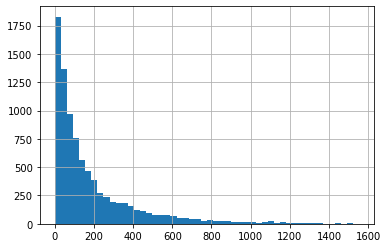

In [521]:
popular_flats['days_exposition'].hist(bins=50)
#popular_flats['days_exposition'].hist(bins=50, range=(800, 2000))

<AxesSubplot:>

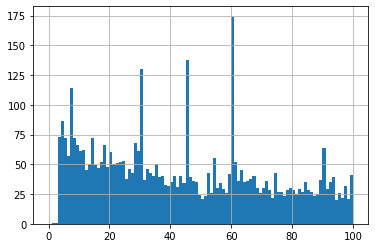

In [522]:
popular_flats['days_exposition'].hist(bins=100, range=(0, 100))

In [559]:
#popular_flats = popular_flats[popular_flats['days_exposition'] != 45]
popular_flats.query('days_exposition != 30 and days_exposition != 45 and days_exposition != 60')

,total_images,last_price,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposed,month_exposed,year_exposed,floor_type,km_to_city_center
0,20,13000000.0,13.00,108.00,2019-03-07,3,2.70,16.0,51.0,8,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
4,2,10000000.0,10.00,100.00,2018-06-19,2,3.03,14.0,32.0,13,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
9,18,5400000.0,5.40,61.00,2017-02-26,3,2.50,9.0,43.6,7,...,NaN,0.0,NaN,289.0,88525.0,6,2,2017,другой,15.0
10,5,5050000.0,5.05,39.60,2017-11-16,1,2.67,12.0,20.3,3,...,310.0,2.0,553.0,137.0,127525.0,3,11,2017,другой,14.0
13,20,3550000.0,3.55,42.80,2017-07-01,2,2.56,5.0,27.0,5,...,294.0,3.0,298.0,366.0,82944.0,5,7,2017,последний,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,9.20,101.00,2019-04-01,3,3.05,15.0,63.0,12,...,NaN,0.0,NaN,23.0,91089.0,0,4,2019,другой,14.0
23689,13,3550000.0,3.55,35.30,2018-02-28,1,2.86,15.0,16.3,4,...,353.0,2.0,652.0,29.0,100567.0,2,2,2018,другой,16.0
23691,11,9470000.0,9.47,72.90,2016-10-13,2,2.75,25.0,40.3,7,...,NaN,1.0,806.0,519.0,129904.0,3,10,2016,другой,4.0
23693,9,4600000.0,4.60,62.40,2016-08-05,3,2.60,9.0,40.0,8,...,352.0,1.0,675.0,239.0,73718.0,4,8,2016,другой,34.0


Посмотрим на зависимость цены и общей площади. Мы видим достаточно высокую плотность рассеяния. Корреляция равна 0.74, это ближе к единице, значит, ее можно признать досаточно высокой.

В зависимости от типа квартиры бесплатное объявление можно разместить на 30, 45, 60 дней. А если платное, то каждые 30 дней снимается оплата. По такой логике, продажи до 45 дней, можно считать быстрыми, а более полугода - медленными. Оговоримся, что сейчас в правилах бесплатное объявление для СПб и области может висеть до 120 дней, но может до 2020 г. для них тоже действовало правило 30-45-60.
    
Мы убираем из таблицы именно выбросы на 30-45-60 дней, потому что это по сути не продажи, а просто снятые объявления

<AxesSubplot:xlabel='last_price_mln', ylabel='total_area'>

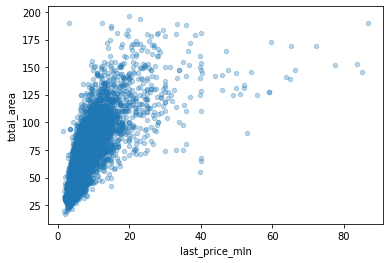

In [524]:
popular_flats.plot(x='last_price_mln', y='total_area', kind='scatter', alpha=0.3)

In [525]:
popular_flats['last_price_mln'].corr(data['total_area'])

0.745040949225087

Для сравнения посчитаем корреляцию для квартир с ценой ниже 20 млн. Для них корреляция с площадью оказывается еще выше.

In [526]:
filtered_total_area = popular_flats.query('last_price_mln < 20')
filtered_total_area['last_price_mln'].corr(popular_flats['total_area'])

0.8129613604376162

Далее посмотрим на зависимость цены от жилой площади. Корреляция все еще достаточно высокая, но уже ниже, чем для общей площади.

<AxesSubplot:xlabel='last_price_mln', ylabel='living_area'>

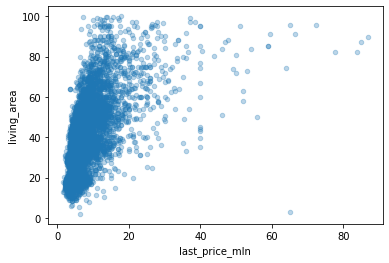

In [527]:
popular_flats.plot(x='last_price_mln', y='living_area', kind='scatter', alpha=0.3)

In [528]:
popular_flats['last_price_mln'].corr(popular_flats['living_area'])

0.6245605401513689

Для сравнения сделаем расчеты для значений цены ниже 20 млн

In [529]:
filtered_living_area = popular_flats.query('last_price_mln < 20')
filtered_living_area['last_price_mln'].corr(popular_flats['living_area'])

0.6872822314189875

Для площади кухни корреляция еще ниже, чем в двух предыдущих случаях

<AxesSubplot:xlabel='last_price_mln', ylabel='kitchen_area'>

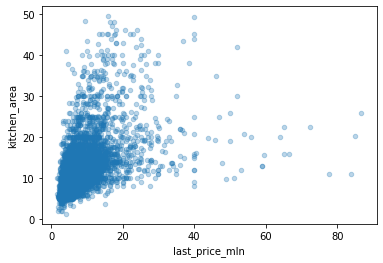

In [530]:
popular_flats.plot(x='last_price_mln', y='kitchen_area', kind='scatter', alpha=0.3)

In [531]:
popular_flats['last_price_mln'].corr(popular_flats['kitchen_area'])

0.5465482542531812

In [532]:
filtered_kitchen_area = popular_flats.query('last_price_mln < 20')
filtered_kitchen_area['last_price_mln'].corr(popular_flats['kitchen_area'])

0.6003180879055473

Связь между днем размещения объявляния и ценой практически отсутствует, хотя под конец недели размещалось несколько дорогих вариантов.

<AxesSubplot:xlabel='weekday_exposed', ylabel='last_price_mln'>

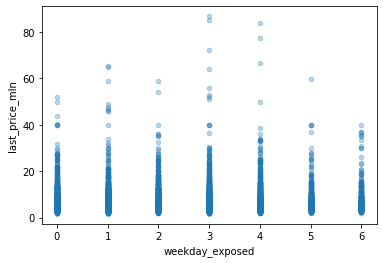

In [533]:
popular_flats.plot(x='weekday_exposed', y='last_price_mln', kind='scatter', alpha=0.3)

In [534]:
popular_flats['weekday_exposed'].corr(popular_flats['last_price_mln'])

-0.008211754396625918

<AxesSubplot:xlabel='weekday_exposed'>

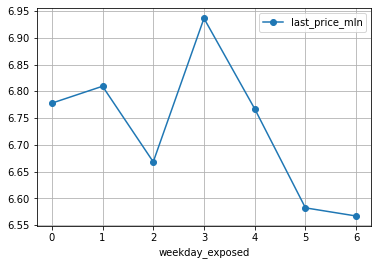

In [535]:
popular_flats.pivot_table(index='weekday_exposed', values='last_price_mln', aggfunc='mean')\
                            .plot(style='o-', grid=True)

Очевидна связь с этажностью. Квартиры на первых этажах в среднем стоят дешевле, на других и последний - примерно одинаково.

<AxesSubplot:xlabel='floor_type', ylabel='last_price_mln'>

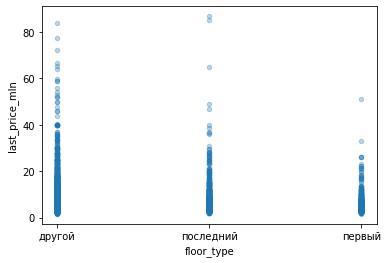

In [536]:
popular_flats.plot(x='floor_type', y='last_price_mln', kind='scatter', alpha=0.3)

In [537]:
popular_flats_floor = popular_flats.pivot_table(index='floor_type', values='last_price_mln', aggfunc='mean')
popular_flats_floor

,last_price_mln
floor_type,
другой,6.921418
первый,5.485595
последний,6.980346


В данных мы видим в целом слабую корреляцию между днем, месяцем и годом размещения объявления.

array([[<AxesSubplot:xlabel='last_price_mln', ylabel='last_price_mln'>,
        <AxesSubplot:xlabel='weekday_exposed', ylabel='last_price_mln'>,
        <AxesSubplot:xlabel='month_exposed', ylabel='last_price_mln'>,
        <AxesSubplot:xlabel='year_exposed', ylabel='last_price_mln'>],
       [<AxesSubplot:xlabel='last_price_mln', ylabel='weekday_exposed'>,
        <AxesSubplot:xlabel='weekday_exposed', ylabel='weekday_exposed'>,
        <AxesSubplot:xlabel='month_exposed', ylabel='weekday_exposed'>,
        <AxesSubplot:xlabel='year_exposed', ylabel='weekday_exposed'>],
       [<AxesSubplot:xlabel='last_price_mln', ylabel='month_exposed'>,
        <AxesSubplot:xlabel='weekday_exposed', ylabel='month_exposed'>,
        <AxesSubplot:xlabel='month_exposed', ylabel='month_exposed'>,
        <AxesSubplot:xlabel='year_exposed', ylabel='month_exposed'>],
       [<AxesSubplot:xlabel='last_price_mln', ylabel='year_exposed'>,
        <AxesSubplot:xlabel='weekday_exposed', ylabel='year_exposed'>

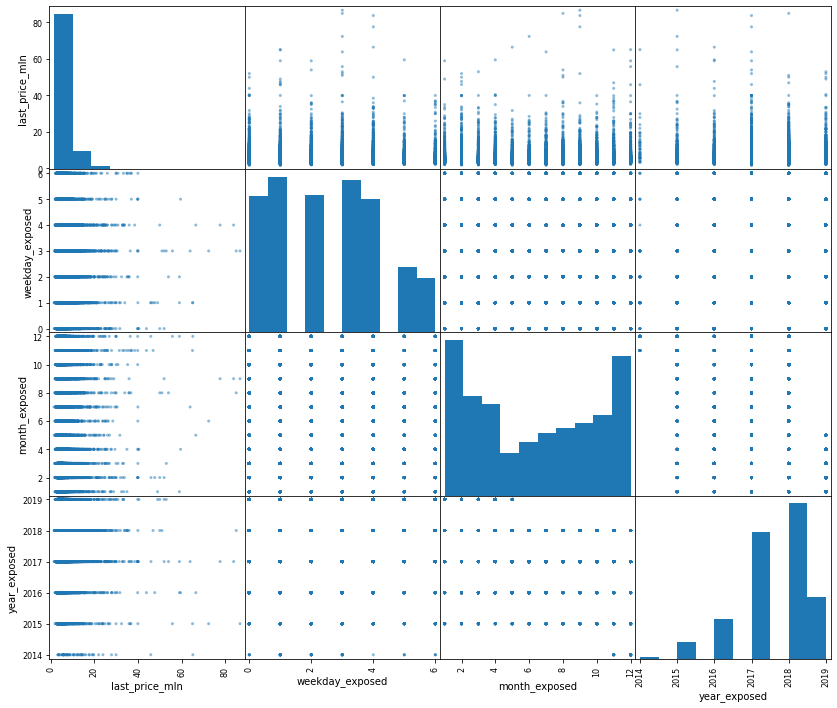

In [539]:
calendar = popular_flats.loc[:, ['last_price_mln', 'weekday_exposed', 'month_exposed', 'year_exposed']]
calendar
pd.plotting.scatter_matrix(calendar, figsize=(14, 12))

<AxesSubplot:xlabel='weekday_exposed'>

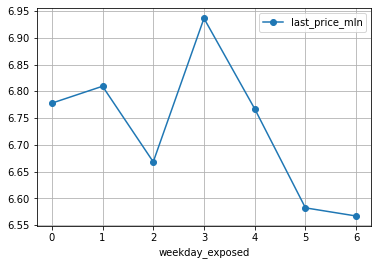

In [543]:
popular_flats.pivot_table(index='weekday_exposed', values='last_price_mln', aggfunc='mean')\
                            .plot(style='o-', grid=True)

<AxesSubplot:xlabel='month_exposed'>

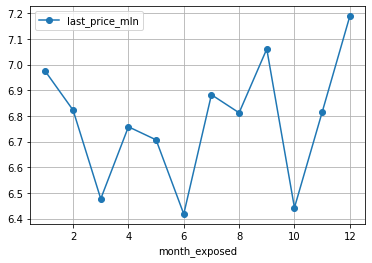

In [544]:
popular_flats.pivot_table(index='month_exposed', values='last_price_mln', aggfunc='mean')\
                            .plot(style='o-', grid=True)

<AxesSubplot:xlabel='year_exposed'>

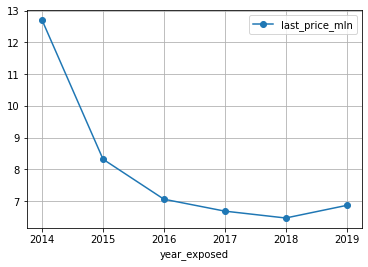

In [546]:
popular_flats.pivot_table(index='year_exposed', values='last_price_mln', aggfunc='mean')\
                            .plot(style='o-', grid=True)

Количество комнат

Средняя цена квартиры растет с ростом числа комнат, но корреляция не такая сильная. Скорее всего для цены большее значение имеет общая площадь квартиры, а количество комнта уже следует за ним.

<AxesSubplot:xlabel='rooms', ylabel='last_price_mln'>

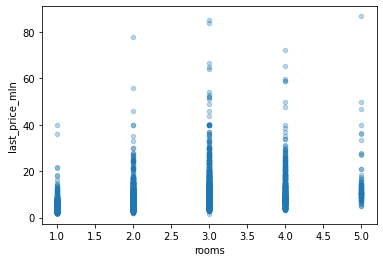

In [547]:
popular_flats.plot(x='rooms', y='last_price_mln', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='rooms'>

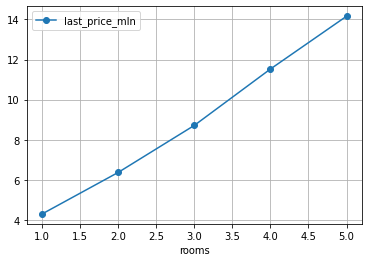

In [548]:
popular_flats.pivot_table(index='rooms', values='last_price_mln', aggfunc='mean')\
                            .plot(style='o-', grid=True)

In [549]:
popular_flats['rooms'].corr(popular_flats['last_price_mln'])

0.4342955275766741

In [550]:
popular_flats.pivot_table(index='rooms', values='last_price_mln', aggfunc=['count', 'mean', 'sum'])

,count,mean,sum
,last_price_mln,last_price_mln,last_price_mln
rooms,,,
1,3239,4.298839,13923.938848
2,3491,6.370694,22240.094471
3,2907,8.715686,25336.500209
4,620,11.526986,7146.731053
5,99,14.159631,1401.803470


In [551]:
popular_flats.pivot_table(index='rooms', values=['last_price_mln', 'total_area'], aggfunc='mean')

,last_price_mln,total_area
rooms,,
1,4.298839,37.963137
2,6.370694,56.631656
3,8.715686,78.069907
4,11.526986,101.829387
5,14.159631,126.124343


In [552]:
top_location = popular_flats.pivot_table(index='locality_name', values='square_meter_price', \
                                         aggfunc=('mean', 'count'))
top_location.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,8978,112552.204277
Пушкин,211,103409.824645
Шушары,202,79311.599010
Колпино,192,75664.156250
Петергоф,136,84343.558824
Парголово,130,91177.061538
Сестрорецк,119,102439.529412
Красное Село,101,73166.693069
Ломоносов,87,73931.321839


Самый дорогой квадратный метр получился в Репино. Но в нем всего два объявления.

In [553]:
top_location.nlargest(1, 'mean')

,count,mean
locality_name,,
Репино,2,127678.5


Среди топ-10 по объявлениям лидер по цене - Санкт-Петербург

In [554]:
top_location.sort_values(by='count', ascending=False).head(10).nlargest(1, 'mean')

,count,mean
locality_name,,
Санкт-Петербург,8978,112552.204277


Самый дешевый - в Саперном. В нем всего одно объявление.

In [555]:
top_location.nsmallest(1, 'mean')

,count,mean
locality_name,,
Саперный,3,62985.333333


Среди топ-10 объявлений самый дешевый квадратный метр в Красном Селе.

In [556]:
top_location.sort_values(by='count', ascending=False).head(10).nsmallest(1, 'mean')

,count,mean
locality_name,,
Красное Село,101,73166.693069


Для Санкт-Петербурга ожидаемо, что с увеличением расстояния от центра снижается средняя цена квадратного метра.

In [557]:
spb_location = popular_flats[popular_flats['locality_name'] == 'Санкт-Петербург']
spb_location = spb_location.loc[:, ['locality_name', 'square_meter_price', 'km_to_city_center']]
spb_location_pivot = spb_location.pivot_table(index='km_to_city_center', values='square_meter_price', \
                                              aggfunc='mean')
spb_location_pivot

,square_meter_price
km_to_city_center,
0.0,158005.900000
1.0,138835.924528
2.0,153986.401163
3.0,117251.055556
4.0,128639.732970
5.0,133737.084416
6.0,139359.731034
7.0,151157.497854
8.0,124900.066092


<AxesSubplot:xlabel='km_to_city_center'>

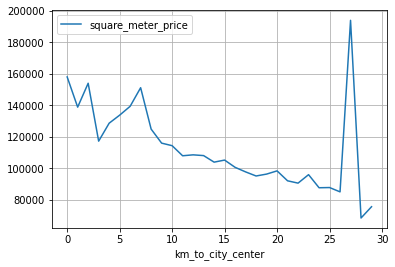

In [558]:
spb_location_pivot.plot(grid=True)

### Общий вывод

Мы провели исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пункта за несколько лет.

Первый взгляд на гистограммы необработанных данных позволил сделать следующие выводы:
1. площадь большиства квартир в пределах 100 кв м
2. большинство имеет 1-3 комнаты
3. основная масса квартир расположена в пределах первых 10 этажей
4. площадь кухонь составляет в основном около 10 кв м
5. квартиры либо не имеют балконов, либо 1-2. больше - редко
6. большинство квартир расположены на расстоянии 10-50 км до аэропорта
7. до центра города как правило не больше 20 км
8. большинство квартир не имеют рядом парка в пределах 3 км, либо имеют один
9. тем, у кого есть рядом парк, добираться до него не больше 1 км
10. то же самое можно сказать о прудах, но их распределение по расстоянию более ровное
11. квартиры продаются достаточно быстро, как правило, в течение года

Далее мы определили и обработали пропуски в данных, где это возможно. 

В частности, мы заменили ошибки ввода в значениях высоты потолка (например, заменили 25. на 2.5).

В большинстве случаев пропуски были оставлены, так как однозначной замены найти им не удалось.  

Заполнили пропуски в столбце апартаменты 0, предположив, что если прям не указано, что это апартаменты (1), то это не они. Аналогично поступили со значениями балкона. То же с парками и прудами. Пропуски в двух последних столбцах оставили без изменений, это картографические данные, и очевидно, ближайшие парки очень далеко.

Далее привели различные написания населенных пунктов к единому виду, заменив везде буквы ё на е и отбросив обозначения населенных пунктов (поселок, село).

Мы добавили в таблицу несколько новых столбцов. Это стоимость квадратного метра, день, месяц и год размещения объявления. А также разбили этажи на первый, последний и все остальные (другой). Значения расстояния до центра округлены до км.

Выводы:

Основная масса квартир в объявлениях - это 1-2-3-комнатные квартиры площадью 40-50-70 кв м. Жилая площадь в них составляет 20-30-40 кв м, площадь кухонь 5-12 кв м. Со стандартными потолками 2.5-2.7 м. Дома четко делятся на 5-, 9-этажные и выше.

Расстояние до центра составляет в среднем около 15 км, но есть и более далекие варианты. До аэропорта как правило дольше, чем до центра - в среднем около 29 км. 

Не так много квартир имеют в ближайшем доступе парк или пруд, но если они есть, то до них в среднем не очень далеко.

Представленные в объявлениях квартиры стоят в основном не более 7,5 млн. 

Причем размещаются объявления чаще всего в будни. Также можно отметить сезонность, в первым пиком в феврале-апреле, а затем после летней паузы постепенный выход на новый пик к ноябрю.

Мы определили выбросы в количестве дней размещения объявлений на 30, 45, 60 дней. Это может соответствовать правилам работы сервиса. По истечении этих дней в зависимости от типа квартиры объявление снимается, если речь не идет о платных объявлениях. Поэтому значения в этих днях по большей части нельзя считать продажами.

Мы определили быстрые продажи - в течение 45 дней, более-менее нормальный срок до 180-200 дней, все что выше - необычно медленные продажи.

Самая высокая корреляция цены с общей площадью квартиры - 0.72. С жилой площадью корреляция ниже - 0.61, с площадью кухни еще ниже - 0.54. В ростом количества комнат цена квартиры растете, при этом корреляция - всего 0,43. Скорее всего общая площадь квартиры больше влияет на конечную цену, остальные рассмотренные параметры следуют за ней.

Квартиры на первых этажах стоят заметно дешевле, чем на остальных, включая последние - 5.4 млн против 6.8 млн.

В среднем цена квартиры слабо зависит от времени размещения.

Среди лидеров по размещенным объявлениям самый дорогой кв м в Санкт-Петербурге, самый дешевый - в Красном Селе.

Для Санкт-Петербурга логично, что чем дальше от центра, тем дешевле кв м - до 150 тыс против 83 тыс